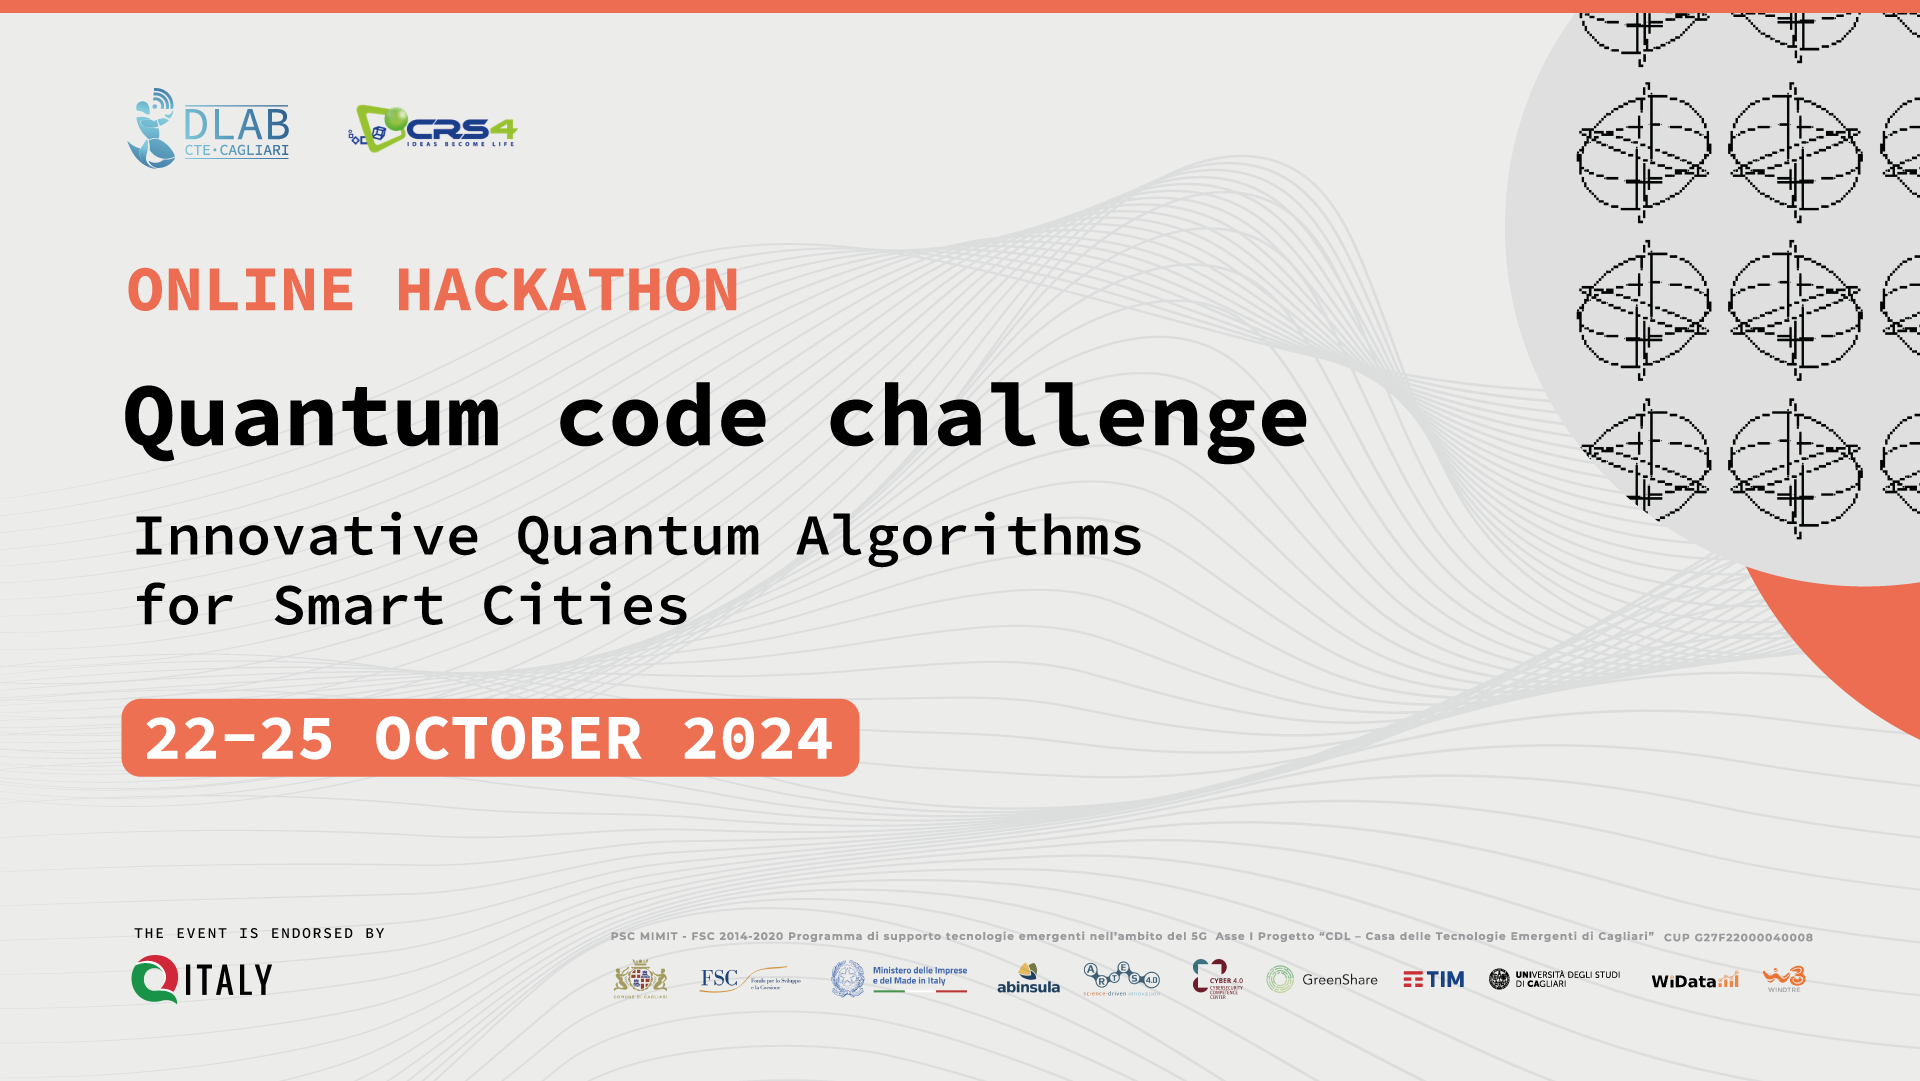

## 3. Getting familiar with the Toffoli gate



In classical computation we often use Boolean logic gates, functions with only binary values 0 and 1 as input and output. Interesting in Boolean logic is that all possible binary functions can be formed using a combination of a small number of logic gates, such as, for example, AND and NOT, or OR and NOT, which are considered, for this very reason, the foundations of classical computation. 



**Scope**

The purpose of this exercise is to explore the concept of quantum gates and, in particular, to construct a Toffoli gate using CX, RZ, SX and X gates. We are taking inspiration for this from the Qiskit community-2021 IBM quantum challenge. 



In [1]:
import os
from  client_grader import *
os.environ["TEAM_NAME"] = "pippo"
grader=Crs4GraderClient()

In [2]:
# Importare le librerie standard Qiskit 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import *

import math
pi=math.pi



2024-10-19 19:36:22,196 - INFO - Pass: UnrollCustomDefinitions - 0.00000 (ms)
2024-10-19 19:36:22,197 - INFO - Begin BasisTranslator from source basis {('u3', 1)} to target basis {'ry', 'p', 'cx', 'rx', 'measure', 'reset', 'u', 'z', 'barrier', 'rz', 'snapshot', 'delay', 'store', 'x'}.
2024-10-19 19:36:22,198 - INFO - Basis translation path search completed in 0.001s.
2024-10-19 19:36:22,198 - INFO - Basis translation paths composed in 0.000s.
2024-10-19 19:36:22,199 - INFO - Basis translation instructions replaced in 0.000s.
2024-10-19 19:36:22,199 - INFO - Pass: BasisTranslator - 1.98746 (ms)


## Quantum circuits and gates

The quantum circuits are the models of the quantum computation, consisting of a sequence of quantum gates, which are often rotations on the sphere..

### The X gate  

The X-gate, which consists of a rotation of $\pi$ radians around the X-axis on the Bloch sphere, is represented by the Pauli-X matrix:

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

Quantum equivalent of the classical NOT gate, it transforms $|0\rangle$ into $|1\rangle$ and $|1\rangle$ into $|0\rangle$ and is also called by the name bit-flip.

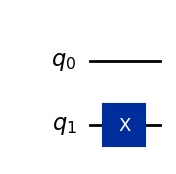

In [3]:
x_gate=QuantumCircuit(2)

x_gate.x(1)
x_gate.draw(output='mpl')

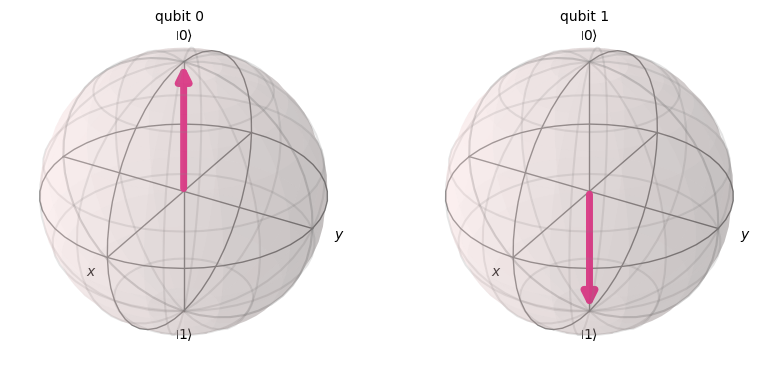

In [4]:
sim =AerSimulator(method='statevector')
x_gate.save_statevector()
job = sim.run(x_gate)
result=job.result()
vectors=result.get_statevector()
plot_bloch_multivector(vectors)

### SX and SX dagger gates 

The SX gate is a rotation of $\pi/2$ around the X axis on the Bloch sphere. It is the square root of X and, applied twice, it produces the Pauli-X gate. 
$$SX = \frac{1}{\sqrt{2}}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$$
The rotation in the opposite direction of $\pi/2$ is the SX dagger port.

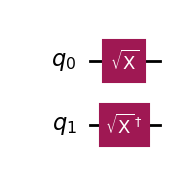

In [5]:
sx_gate = QuantumCircuit(2)
sx_gate.sx(0)  
sx_gate.sxdg(1)
sx_gate.draw(output='mpl')

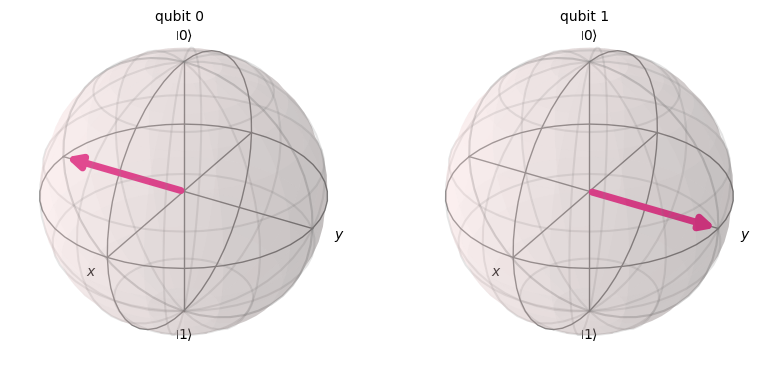

In [6]:
sx_gate.save_statevector()
job = sim.run(sx_gate)
result=job.result()
vectors=result.get_statevector()
plot_bloch_multivector(vectors)



### RZ gate 

The Rz gate completes a $\phi$ rotation about the Z direction axis ($\phi$ is a real number) and has the form of the following matrix:

$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

Obviously, by applying a rotation around the Z-axis to the base state 0\rangle$, we get the same state, so to see the effect of the rotation, we use the state generated by the SX gate.


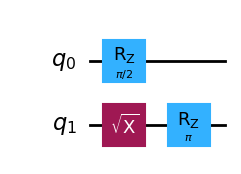

In [7]:
rz_gate = QuantumCircuit(2)
rz_gate.rz(pi/2, 0)
rz_gate.sx(1)
rz_gate.rz(pi, 1)
rz_gate.draw(output='mpl')

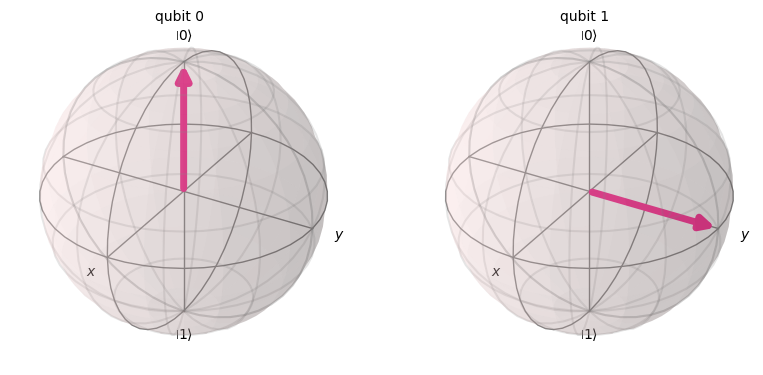

In [8]:
rz_gate.save_statevector()
job = sim.run(rz_gate)
result=job.result()
vectors=result.get_statevector()
plot_bloch_multivector(vectors)


### Hadamard gate 
The Hadamard gate is a rotation of $\pi$ radians about the axis in between the X and Z axes. It transforms the base state $|0\rangle$ into the state $|+\rangle=\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probability of yielding outcome `1` or `0`, creating a superposition of states. In fact, Hadamard transforms the basis $|0\rangle$ $|1\rangle$ into the basis $|+\rangle$ $|-\rangle$, where $|-\rangle=\frac{|0\rangle - |1\rangle}{\sqrt{2}}$. The matrix representing the Hadamard gate is as follows:

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

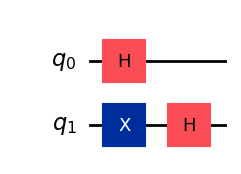

In [9]:
h_gate = QuantumCircuit(2)
h_gate.h(0)
h_gate.x(1)
h_gate.h(1)
h_gate.draw(output='mpl')

In [ ]:
h_gate.save_statevector()
job = sim.run(h_gate)
result=job.result()
vectors=result.get_statevector()
plot_bloch_multivector(vectors)
print(vectors)

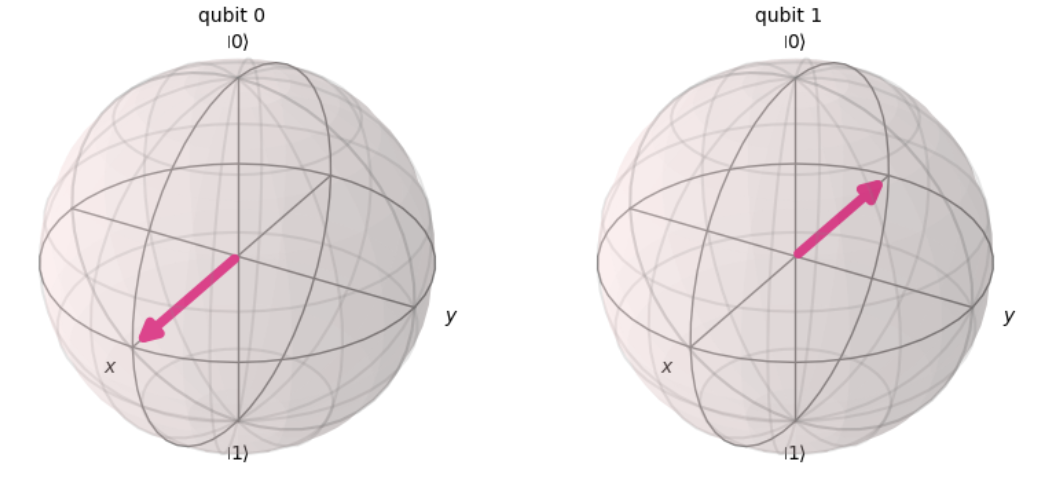

### CNOT gate

The controlled NOT gate (CNOT or CX) is a two-qubit gate which applies NOT to the second qubit only if the first qubit is $|1\rangle$.


$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

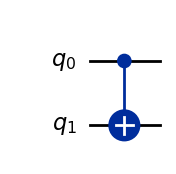

In [11]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### Toffoli gate (CCX gate)

The CCX gate, also called the Toffoli gateport, is a three-qubit gate, with two control qubits and one target qubit.
If the first two qubits are in the $|1\rangle$ state, the Toffoli gate applies a NOT to the third qubit, otherwise it does nothing.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

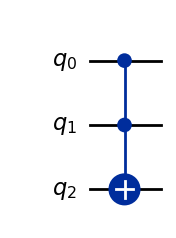

In [12]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')


## Composite gates

A quantum computer normally does not have all gates physically implemented, but a reduced set of basic gates, which form a universal set of gates, that is, a set of instructions that can be used to implement all possible operations.
Thas is why quantum circuits must be converted to basic gates before execution. This is done by Qiskit automatically, but in this exercise, we do it by hand to learn. For example, consider the following circuit and see what a decomposition of it can look like using only the basic gates CX, RZ, SX and X.

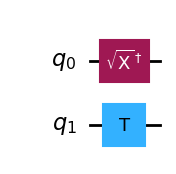

In [14]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.t(1)
qc.draw(output='mpl')

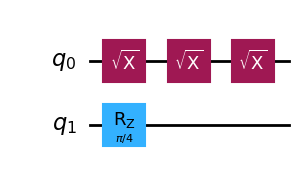

In [15]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi/4,1)
qc.draw(output='mpl')

Let us see how to construct a Hadamard gate, since we do not have a direct rotation around the axis in the middle of the X and Z axes, but can instead use rotations around X and Z.

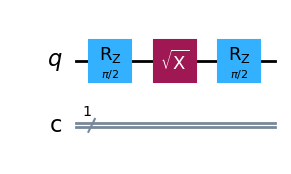

In [16]:
q=QuantumRegister(1, "q")
c=ClassicalRegister(1, "c")
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

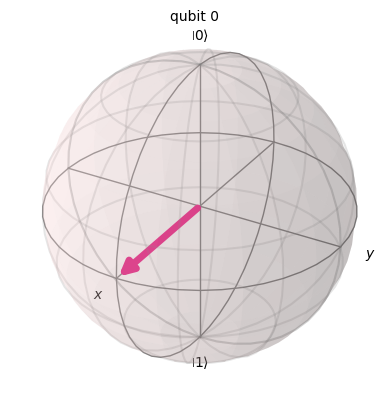

In [17]:
qc.save_statevector()
job = sim.run(qc)
result=job.result()
vectors=result.get_statevector()
plot_bloch_multivector(vectors)

This is the circuit above when we saw that the rotation of the RZ gate has no effect on the states $|0\rangle$ and $|1\rangle$. But on the states $|+\rangle$ and $|-\rangle$ the first rotation has an effect. Here we have the opposite situation, since after applying the SX gate we are again in the state $|0\rangle$ or $|1\rangle$ and then the second RZ has no effect.


 

### Controlled controlled rotations

Let us also see how we can construct a controlled rotation about the Y axis. We observe that if the first qubit is 0, then the two rotations cancel each other. If, on the other hand, the first qubit is 1, we will obtain a state that is equivalent to the apllication of the rotation of $\theta / 2$ twice forming the initial rotation $\theta$, due to the orthogonality of the X and Y axes. 



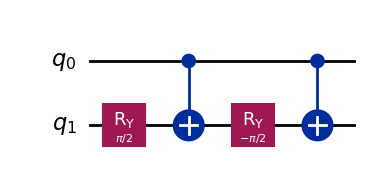

In [18]:
qc = QuantumCircuit(2)
theta = pi # Theta can be anything (pi chosen arbitrarily)
#qc.x(0)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw(output='mpl')

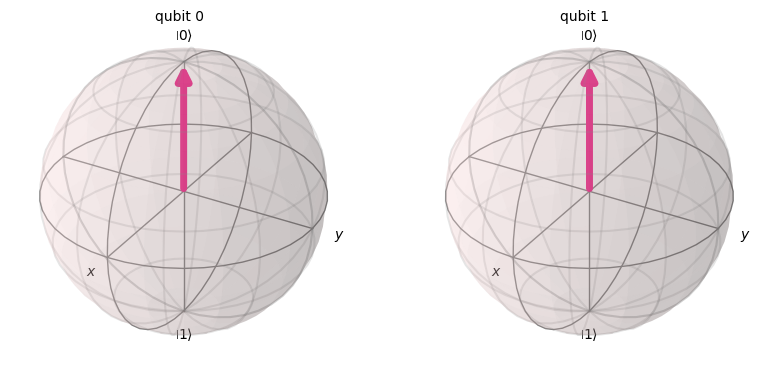

In [19]:
qc.save_statevector()
job= sim.run(qc)
result =job.result().get_statevector()
plot_bloch_multivector(result)

Now suppose we have a controlled rotation and we want to construct a doubly controlled rotation that is applied only if both control bits are 1. 

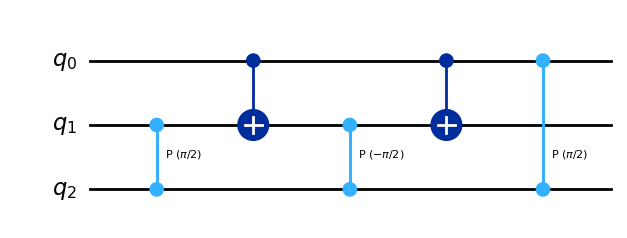

In [20]:
qc = QuantumCircuit(3)
theta = pi # Theta can be anything (pi chosen arbitrarily)
qc.cp(theta/2,1,2)
qc.cx(0,1)
qc.cp(-theta/2,1,2)
qc.cx(0,1)
qc.cp(theta/2,0,2)
qc.draw(output='mpl')

If the first two bits are 0, nothing happens. If only the second bit is 1, we first apply a rotation of $\pi/2$ and then a rotation of $-\pi/2$ that cancels the other. If only the first bit is 1, then the second bit will also be 1 after the first CNOT, so a rotation of $-\pi/2$ will be applied, followed by a rotation of $-\pi/2$ and these two rotations cancel each other again. If the first and second bits are 1, then first there will be a rotation of $\pi/2$, then the second bit will become 0, so the next rotation does not apply, and it is reversed to 1, after which another rotation of $\pi/2$ is applied to it. With these two rotations there will be a rotation of $\pi$ radians.


## Implementation

With the knowledge gained so far, and using only the basic gates CX, RZ, SX and X, try to construct a Toffoli gate, given its importance since, in combination with the Hadamard gate, it forms a simple universal gate set for quantum computation.

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from numpy import pi

In [1]:
# Write here you code
qc = QuantumCircuit(3)
theta = pi # Theta qualsiasi



qc.draw(output='mpl')

NameError: name 'QuantumCircuit' is not defined

In [ ]:
simulator =AerSimulator()
shots = 1024

qc.measure_all()
# Execute the circuit on the simulator
job = simulator.run(qc, shots=shots)

# Get the results
results = job.result()
counts = results.get_counts(qc)
print(counts)


### Q3.1 
Provide the grader with the result of the circuit execution.

In [ ]:
grader.check_submission(str(counts), '3.1')
file_result = grader.submit_exercise( str(counts), '3.1')